<a href="https://colab.research.google.com/github/migel-cepele/ComputerVision/blob/main/ImageClassificationEx4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-4-0d20efb6fbc8>:9: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  sk.io.imshow(blobs)


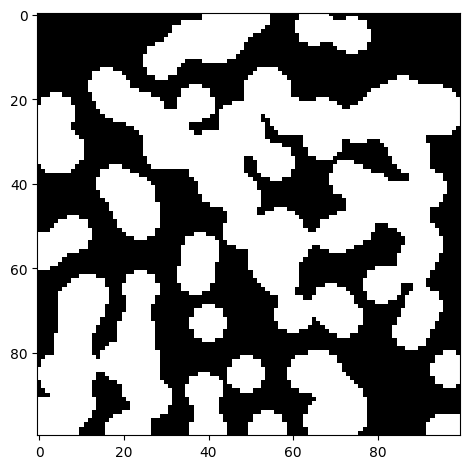

In [4]:
#1. Generate synthetic image with random blobs
import skimage as sk
from skimage.morphology import erosion, dilation
from skimage.morphology import disk


blobs = sk.data.binary_blobs(length=100, blob_size_fraction=0.1)

sk.io.imshow(blobs)

/usr/local/lib/python3.11/dist-packages/skimage/exposure/exposure.py:306: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
  hist, bin_edges = np.histogram(image, bins=bins, range=hist_range)


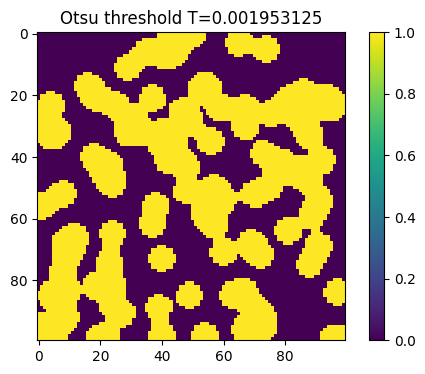

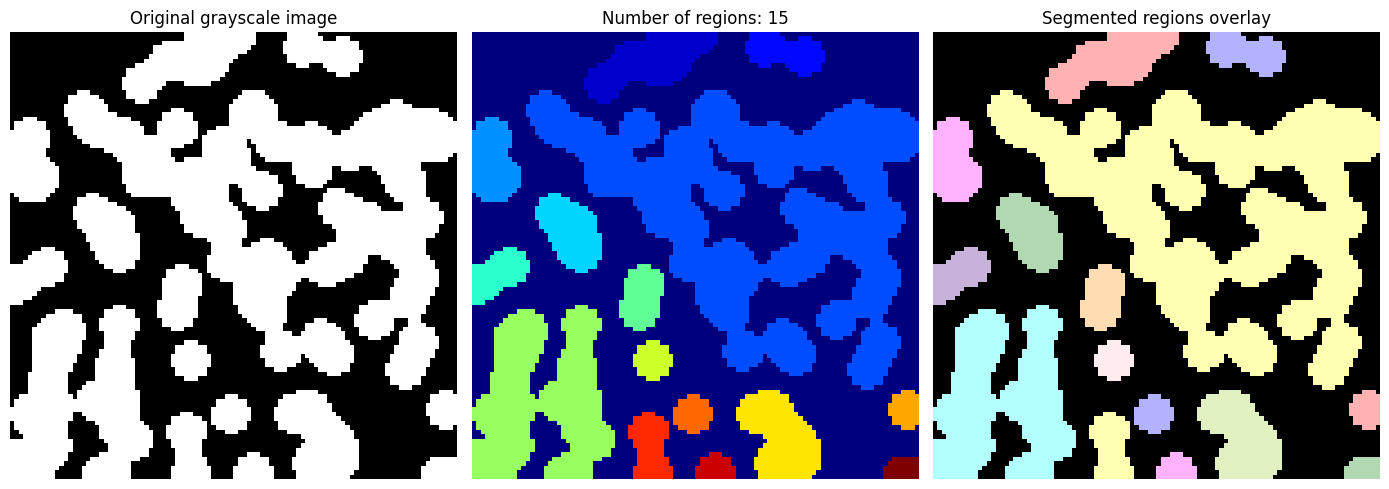

In [5]:
# 2. Object segmentation and labeling

#- Segmentation of blobs using Otsu's optimal threshold
#- Labeling connected regions
#- Visualization

from skimage.filters import threshold_otsu
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

thresh = threshold_otsu(blobs)
binary = blobs > thresh # blobs have higher value than the background


fig = plt.figure(figsize=(6,4), dpi= 100, facecolor='w', edgecolor='k')
imgplot = plt.imshow(binary)
plt.title('Otsu threshold T={}'.format(thresh))
plt.colorbar()
plt.show()


#labeling regions
from skimage.measure import label
from skimage.color import label2rgb


# label image regions:
label_image, nregions = label(binary,return_num=True)
image_label_overlay = label2rgb(label_image, image=blobs)

# Get some figures:
fig, axes = plt.subplots(1,3,figsize=(14, 9))
ax = axes.ravel()
ax[0].imshow(blobs,cmap=plt.cm.gray)
ax[0].set_title('Original grayscale image')
ax[1].imshow(label_image,cmap=plt.cm.jet)
ax[1].set_title('Number of regions: {}'.format(nregions)) # set figure title
ax[2].imshow(image_label_overlay,cmap=plt.cm.jet)
ax[2].set_title('Segmented regions overlay')

ax[0].set_axis_off()
ax[1].set_axis_off()
ax[2].set_axis_off()
plt.tight_layout()
plt.show()


In [6]:
# 3. Get regional properties in a pandas dataframe

#Function documentation with a list of available attributes can be found at https://scikit-image.org/docs/stable/api/skimage.measure.html#skimage.measure.regionprops_table

import pandas as pd
from skimage import measure

props = measure.regionprops_table(label_image,properties=['label','area','eccentricity','extent','axis_major_length'])

df_features = pd.DataFrame(props)
df_features.head()

,label,area,eccentricity,extent,axis_major_length
0,1,266.0,0.936200,0.554167,31.975280
1,2,125.0,0.903147,0.694444,19.902429
2,3,2599.0,0.750897,0.440807,92.221188
3,4,167.0,0.844941,0.799043,20.307228
4,5,180.0,0.809263,0.666667,19.900167


<Axes: xlabel='axis_major_length', ylabel='area'>

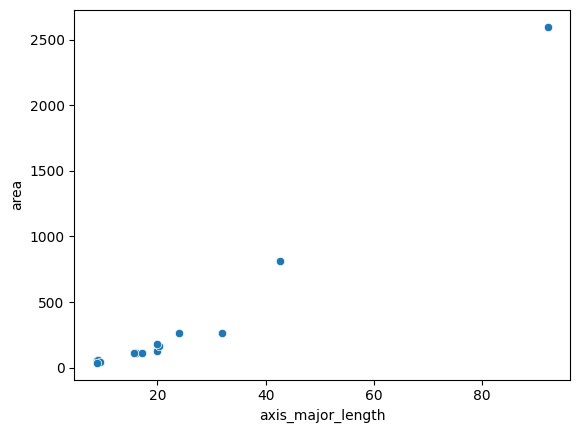

In [7]:
#Represent area of the blobs as a function of the major axis length
import seaborn as sns

sns.scatterplot(x='axis_major_length',y='area',data=df_features)

In [8]:
#how many blobs have the area above average
df_features.loc[df_features['area']>=df_features['area'].mean()]

mean_blobs_area = df_features['area'].mean()
df_large_blobs = df_features.loc[df_features['area']>=mean_blobs_area]
N_large = df_large_blobs.shape[0]
print('there are {} blobs with an area larger or equal the mean area {}'.format(N_large,mean_blobs_area))

there are 2 blobs with an area larger or equal the mean area 333.3333333333333


In [9]:
#blobs with area smaller than mean blob area

df_small_blobs = df_features.loc[df_features['area']<mean_blobs_area]
N_small = df_small_blobs.shape[0]
print('there are {} blobs with an area smaller than the mean area {}'.format(N_small,mean_blobs_area))

there are 13 blobs with an area smaller than the mean area 333.3333333333333


In [10]:
# labels of small and large blobs
labels_small = df_small_blobs['label'].values
print('labels of small blobs: {}'.format(labels_small))
labels_large = df_large_blobs['label'].values
print('labels of large blobs: {}'.format(labels_large))


labels of small blobs: [ 1  2  4  5  6  7  9 10 11 12 13 14 15]
labels of large blobs: [3 8]


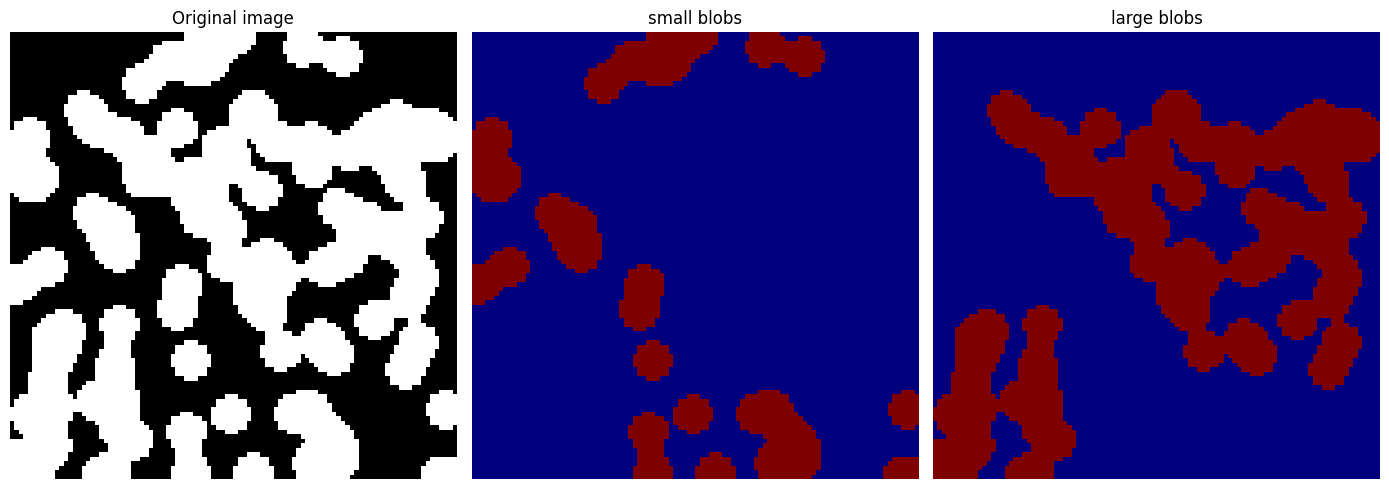

In [11]:
# binary mask of the small and large blobs
import numpy as np
mask_small_blobs = np.isin(label_image,labels_small)
mask_large_blobs = np.isin(label_image,labels_large)

# Get some figures:
fig, axes = plt.subplots(1,3,figsize=(14, 9))
ax = axes.ravel()
ax[0].imshow(blobs,cmap=plt.cm.gray)
ax[0].set_title('Original image')
ax[1].imshow(mask_small_blobs,cmap=plt.cm.jet)
ax[1].set_title('small blobs') # set figure title
ax[2].imshow(mask_large_blobs,cmap=plt.cm.jet)
ax[2].set_title('large blobs')

ax[0].set_axis_off()
ax[1].set_axis_off()
ax[2].set_axis_off()
plt.tight_layout()
plt.show()

In [12]:
#texture based regional properties
from skimage.feature.texture import graycomatrix, graycoprops

image = np.array([[0, 0, 1, 1],[0, 0, 1, 1],[0, 2, 2, 2],[2, 2, 3, 3]], dtype=np.uint8)
g = graycomatrix(blobs, [1], [0], levels=4, normed=False, symmetric=False)
print(image)
print('Number of times that a grayscale level zero has a neighbour with value zero at a distance of 1 pixel to the right (angle equal zero): {}'.format(g[0,0,0,0]))
print('Number of times that a grayscale level zero has a neighbour with value 1 at a distance of 1 pixel to the right (angle equal zero): {}'.format(g[0,1,0,0]))
print('Number of times that a grayscale level 2 has a neighbour with value 2 at a distance of 1 pixel to the right (angle equal zero): {}'.format(g[2,2,0,0]))
print('Number of times that a grayscale level 2 has a neighbour with value 0 at a distance of 1 pixel to the right (angle equal zero): {}'.format(g[2,0,0,0]))


[[0 0 1 1]
 [0 0 1 1]
 [0 2 2 2]
 [2 2 3 3]]
Number of times that a grayscale level zero has a neighbour with value zero at a distance of 1 pixel to the right (angle equal zero): 4526
Number of times that a grayscale level zero has a neighbour with value 1 at a distance of 1 pixel to the right (angle equal zero): 393
Number of times that a grayscale level 2 has a neighbour with value 2 at a distance of 1 pixel to the right (angle equal zero): 0
Number of times that a grayscale level 2 has a neighbour with value 0 at a distance of 1 pixel to the right (angle equal zero): 0
